___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.
We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Verilen veri kümesindeki özellikler:
- ** Rownumber: ** 1'den 10000'e satır numaraları.
- ** MüşteriD: ** Her müşteriyi tanımlayan benzersiz bir kimlik.
- ** Soyadı: ** Müşterinin soyadı.
- ** CreditsCore: ** Kredi puanı, bir tüketicinin kredibilitesini tasvir eden 300-850 arasında bir sayıdır.
- ** Coğrafya: ** Müşterinin ait olduğu ülke.
- ** Cinsiyet: ** Müşterinin Cinsiyeti: Erkek, Kadın
- ** Yaş: ** Müşterinin mevcut yaşı, yıllar içinde, müşteri olduğu zaman.
- ** Görev süresi: ** Müşterinin bankada bulunduğu yıl sayısı.
- ** Denge: ** Müşterinin banka bakiyesi.
- ** NumofProducts: ** Müşterinin kullandığı banka ürünlerinin sayısı.
- ** Hascrcard: ** Banka tarafından müşteriye verilen kredi kartı sayısı.
- ** Isactivemember: ** Müşterinin şirketten çıktığı andan önce bankada aktif olup olmadığını belirtmek için ikili bayrak ("Çıktı" değişkeninde kaydedildi)
- ** Çıktı: ** İkili bayrak 1 Müşteri banka ile kapatılırsa ve müşteri tutulursa 0.

# Improt Libraries & Data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [42]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [46]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True )
# Target a etkisi olmayacak featureları çıkarttım.

In [47]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [48]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

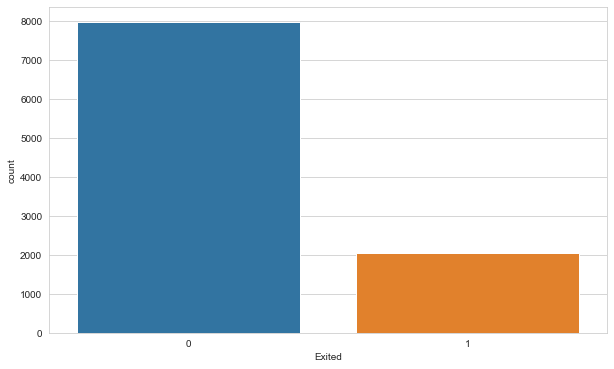

In [49]:
sns.countplot(df.Exited);

<AxesSubplot:>

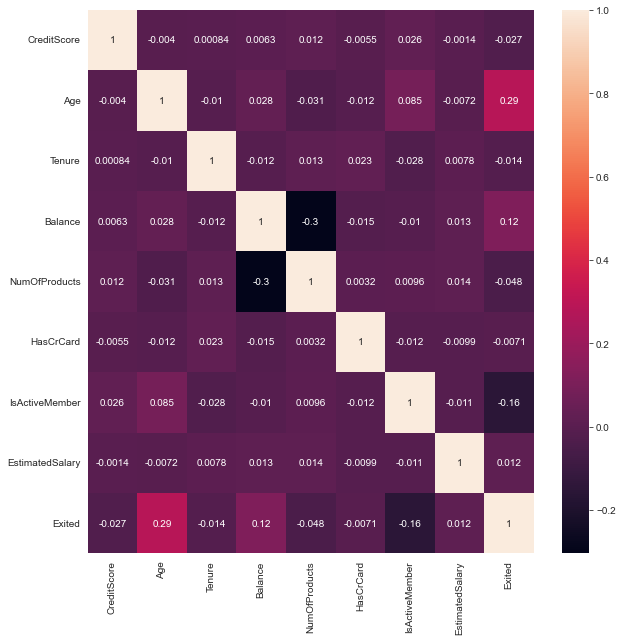

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
# korelasyonlar çok düşük

In [51]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Preprocessing of Data
- Train | Test Split, Scalling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [61]:
cat = df.select_dtypes("object").columns
enc = OrdinalEncoder(handle_unknown="error")
scaler = MinMaxScaler()

In [ ]:
# make_column_transformer((StandardScaler(), ['numerical_column']),(OrdinalEncoder(), ['categorical_column']))

In [62]:
column_trans = make_column_transformer((enc, cat), remainder=MinMaxScaler())

In [63]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [38]:
# X_train= pd.DataFrame(column_trans.fit_transform(X_train), columns=features, index=X_train.index)
# X_test= pd.DataFrame(column_trans.transform(X_test), columns=features, index=X_test.index)

array([ 107.,    0.,    0.,   21.,    9., 2559.,    0.,    0.,    0.,
       7757.])

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [67]:
X_train_trans.shape, X_test.shape

((8500, 10), (1500, 10))

In [69]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train_trans, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

# Modelling & Model Performance

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___